**Part a**

In [30]:
#Installing yahoo finance
!pip install -q yfinance

In [31]:
import yfinance as yf
data = yf.download("BTC-USD", start="2019-01-01", end="2024-01-01")

[*********************100%%**********************]  1 of 1 completed


**Part b**

In [32]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824
...,...,...,...,...,...,...
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014
2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055


**Part c**

In [33]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [34]:
train, test = train_test_split(data['Open'], test_size=0.2, shuffle=False)

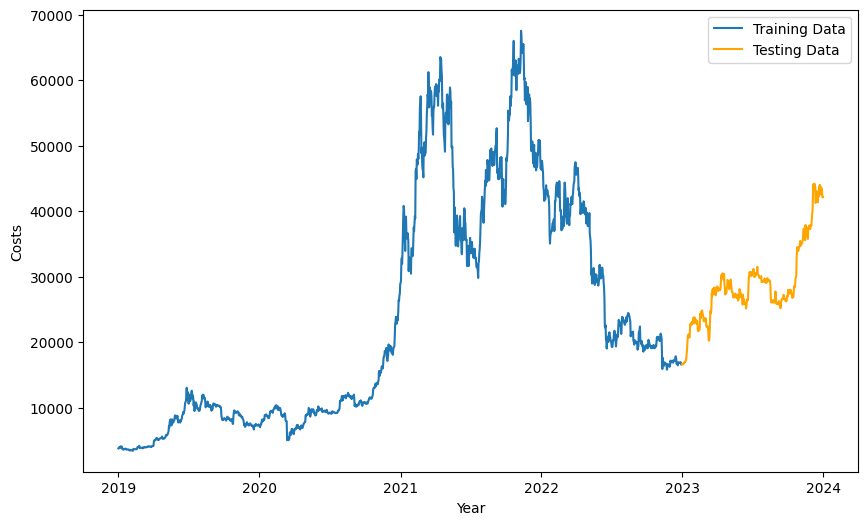

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train.values, label='Training Data')  # Blue line
plt.plot(test.index, test.values, label='Testing Data', color='orange')  # Orange line

# Set labels for x and y axes
plt.xlabel('Year')
plt.ylabel('Costs')

# Display legend to differentiate between training and testing data
plt.legend()

# Show the plot
plt.show()


**Part d**

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train.values.reshape(-1, 1))
test_scaled = scaler.transform(test.values.reshape(-1, 1))

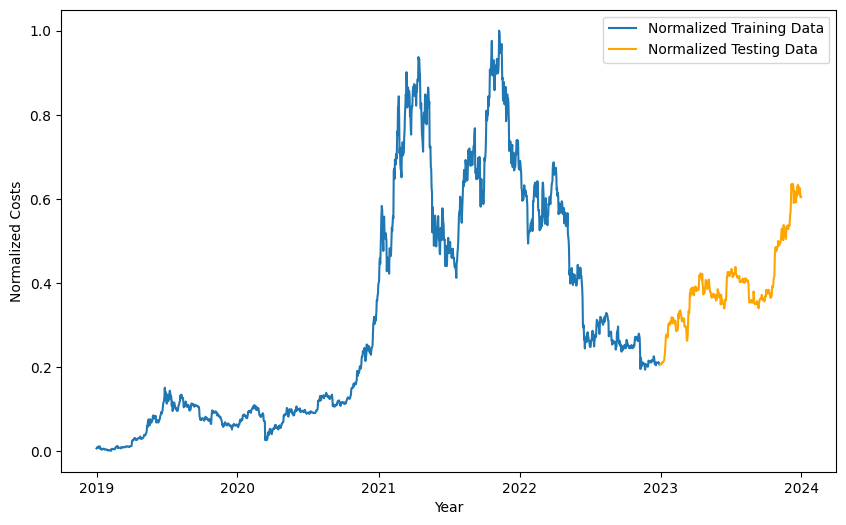

In [38]:
# Plotting the normalized training data
plt.figure(figsize=(10, 6))
plt.plot(train.index, train_scaled, label='Normalized Training Data')  # Blue line
plt.plot(test.index, test_scaled, label='Normalized Testing Data', color='orange')  # Orange line

# Set labels for x and y axes
plt.xlabel('Year')
plt.ylabel('Normalized Costs')

# Display legend to differentiate between training and testing data
plt.legend()

# Show the plot
plt.show()

**Part e**

In [39]:
import numpy as np

In [40]:
# Extract the "Open" price column
prices = data['Open'].values.reshape(-1, 1)

In [41]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices)

In [42]:
# Create input sequences and corresponding output values
sequence_length = 60  # Number of past data points to consider
X_train, y_train = [], []

In [43]:
for i in range(len(prices_scaled) - sequence_length):
    X_train.append(prices_scaled[i:i+sequence_length])
    y_train.append(prices_scaled[i+sequence_length])

X_train, y_train = np.array(X_train), np.array(y_train)

In [44]:
# Print the shapes
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)

X_train.shape: (1766, 60, 1)
y_train.shape: (1766, 1)


**Part f**

In [45]:
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [51]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

**Part g**

In [52]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
56/56 [==============================] - 6s 15ms/step - loss: 0.0147
Epoch 2/100
56/56 [==============================] - 1s 11ms/step - loss: 0.0045
Epoch 3/100
56/56 [==============================] - 1s 11ms/step - loss: 0.0043
Epoch 4/100
56/56 [==============================] - 1s 11ms/step - loss: 0.0033
Epoch 5/100
56/56 [==============================] - 1s 11ms/step - loss: 0.0035
Epoch 6/100
56/56 [==============================] - 1s 11ms/step - loss: 0.0034
Epoch 7/100
56/56 [==============================] - 1s 11ms/step - loss: 0.0033
Epoch 8/100
56/56 [==============================] - 1s 11ms/step - loss: 0.0032
Epoch 9/100
56/56 [==============================] - 1s 11ms/step - loss: 0.0027
Epoch 10/100
56/56 [==============================] - 1s 11ms/step - loss: 0.0028
Epoch 11/100
56/56 [==============================] - 1s 11ms/step - loss: 0.0027
Epoch 12/100
56/56 [==============================] - 1s 12ms/step - loss: 0.0027
Epoch 13/100
56/56 [=====

**Part h**

In [53]:
# Reshape and scale the testing data
X_test = []
for i in range(sequence_length, len(test_scaled)):
    X_test.append(test_scaled[i-sequence_length:i])
X_test = np.array(X_test)

In [54]:
# Make predictions
y_pred = model.predict(X_test)

10/10 [==============================] - 1s 7ms/step


In [55]:
# Inverse transform the predictions and original data
y_pred = scaler.inverse_transform(y_pred)
test_unscaled = scaler.inverse_transform(test_scaled[sequence_length:])

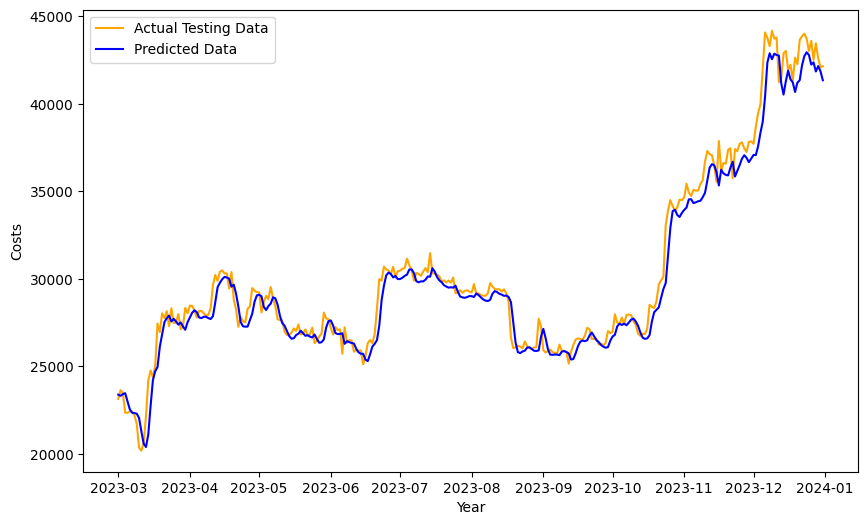

In [56]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(test.index[sequence_length:], test_unscaled, label='Actual Testing Data', color='orange')
plt.plot(test.index[sequence_length:], y_pred, label='Predicted Data', color='blue')
plt.xlabel('Year')
plt.ylabel('Costs')
plt.legend()
plt.show()

**Part i**